### get data from https://www.kaggle.com/c/digit-recognizer/data?select=train.csv

In [335]:
import pandas as pd
train = pd.read_csv('digit-recognizer/train.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
train.shape

(42000, 785)

In [337]:
784**0.5 # 28 x 28 image

28.0

In [338]:
import numpy as np
import matplotlib.pyplot as plt

In [339]:
train.groupby(['label'])['label'].count()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

### randomly display 9 samples along with class

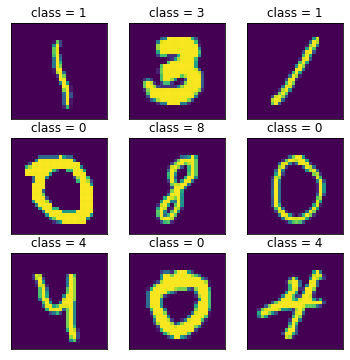

In [340]:
index = np.random.randint(0, train.shape[0], size=9)
fig, axis = plt.subplots(3, 3, figsize=(6,6))
for i in range(3):
    for j in range(3):
        idx = index[3*i + j]
        label = train.label[idx]
        data = train.iloc[idx,1:]
        img = np.array(data).reshape((28,28))
        axis[i][j].set_xticks([])
        axis[i][j].set_yticks([])
        axis[i][j].set_title(f'class = {label}')
        axis[i][j].imshow(img)

training and test splits

In [341]:
# approx 4000 images from each classes
(1000/train.shape[0]) * 100 # 11 % data for testing >> 100 samples from each classes for testing

2.380952380952381

In [342]:
labels = np.array(train.label)
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [343]:
np.random.seed(110)
test_samples_from_each_class = 100
train_idxs=[]
test_idxs=[]
for digit in range(10):
    arr = np.where(labels == digit)[0]
    np.random.shuffle(arr)
    test_idxs.extend(list(arr)[:test_samples_from_each_class])
    train_idxs.extend(list(arr)[test_samples_from_each_class:])

In [344]:
len(set(train_idxs + test_idxs)) == train.shape[0] # sanity checks

True

In [345]:
len(test_idxs)

1000

In [346]:
train_data = train.iloc[train_idxs,:]
test_data = train.iloc[test_idxs,:]
train_data.shape, test_data.shape

((41000, 785), (1000, 785))

In [347]:
temp = train_x, train_y, test_x, test_y = train_data.iloc[:,1:], train_data.iloc[:,0], test_data.iloc[:,1:], test_data.iloc[:,0]

In [348]:
[i.shape for i in temp]

[(41000, 784), (41000,), (1000, 784), (1000,)]

In [349]:
train_x, test_x = train_x.values, test_x.values

In [350]:
train_x, test_x, train_x.shape, test_x.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 (41000, 784),
 (1000, 784))

In [351]:
train_y, test_y = train_y.values, test_y.values
train_y, test_y, train_y.shape, test_y.shape

(array([0, 0, 0, ..., 9, 9, 9], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [352]:
import tensorflow as tf

In [353]:
train_y = tf.keras.utils.to_categorical(train_y)
test_y = tf.keras.utils.to_categorical(test_y)

In [354]:
train_y, test_y, train_y.shape, test_y.shape

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32),
 (41000, 10),
 (1000, 10))

### data preparation complete
### ('_') Hurray

### data normalization

In [355]:
train_x, test_x = train_x/255, test_x/255
train_x, test_x, train_x.shape, test_x.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (41000, 784),
 (1000, 784))

### create neural network architecture

In [369]:
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2

In [378]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(784,), kernel_regularizer=l2(0.001)),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(10)
])

In [379]:
model.compile(optimizer=Adam(learning_rate=0.0015),
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [380]:
hstory = model.fit(train_x, train_y, batch_size=None, epochs=20, validation_data=(test_x, test_y))

Epoch 1/20
1282/1282 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.8588 - val_loss: 0.3979 - val_accuracy: 0.9040
Epoch 2/20
1282/1282 [==============================] - 1s 1ms/step - loss: 0.3289 - accuracy: 0.9252 - val_loss: 0.3723 - val_accuracy: 0.9190
Epoch 3/20
1282/1282 [==============================] - 1s 1ms/step - loss: 0.3011 - accuracy: 0.9344 - val_loss: 0.3394 - val_accuracy: 0.9240
Epoch 4/20
1282/1282 [==============================] - 1s 1ms/step - loss: 0.2817 - accuracy: 0.9397 - val_loss: 0.3314 - val_accuracy: 0.9280
Epoch 5/20
1282/1282 [==============================] - 1s 1ms/step - loss: 0.2674 - accuracy: 0.9421 - val_loss: 0.3182 - val_accuracy: 0.9400
Epoch 6/20
1282/1282 [==============================] - 1s 1ms/step - loss: 0.2580 - accuracy: 0.9451 - val_loss: 0.3280 - val_accuracy: 0.9330
Epoch 7/20
1282/1282 [==============================] - 1s 1ms/step - loss: 0.2524 - accuracy: 0.9470 - val_loss: 0.3184 - val_accuracy:

In [239]:
hstory.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

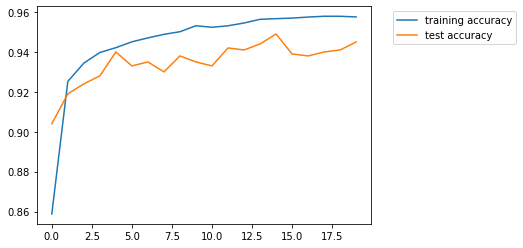

In [381]:
train_acc = hstory.history['accuracy']
test_acc = hstory.history['val_accuracy']
plt.plot(train_acc, label='training accuracy')
plt.plot(test_acc, label='test accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### plot failed classification (failures from validation set)

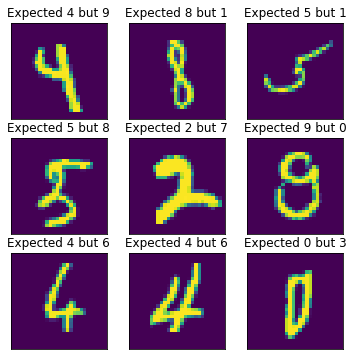

In [382]:
Y_hat = model.predict(test_x)
Y_hat = np.argmax(Y_hat, axis=1)
Y = np.argmax(test_y, axis=1)
failed = np.where(Y_hat != Y)[0]
np.random.shuffle(failed)

fig, axis = plt.subplots(3, 3, figsize=(6,6))
for k, i in enumerate(failed[:9]):
    actual = Y_hat[i]
    expected = Y[i]
    data = test_x[i,:]
    img = np.array(data).reshape((28,28))
    j = k % 3
    i = k // 3
    axis[i][j].set_xticks([])
    axis[i][j].set_yticks([])
    axis[i][j].set_title(f'Expected {expected} but {actual}')
    axis[i][j].imshow(img)

### plot failed classification (failures from train set)

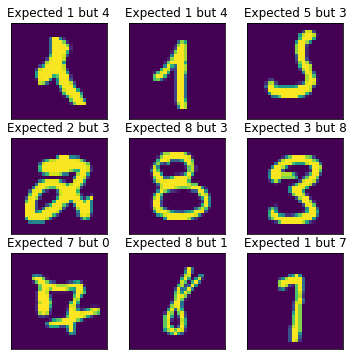

In [383]:
Y_hat = model.predict(train_x)
Y_hat = np.argmax(Y_hat, axis=1)
Y = np.argmax(train_y, axis=1)
failed = np.where(Y_hat != Y)[0]
np.random.shuffle(failed)

fig, axis = plt.subplots(3, 3, figsize=(6,6))
for k, i in enumerate(failed[:9]):
    actual = Y_hat[i]
    expected = Y[i]
    data = train_x[i,:]
    img = np.array(data).reshape((28,28))
    j = k % 3
    i = k // 3
    axis[i][j].set_xticks([])
    axis[i][j].set_yticks([])
    axis[i][j].set_title(f'Expected {expected} but {actual}')
    axis[i][j].imshow(img)

### do the prediction and submit to kaggle

In [384]:
test = pd.read_csv('digit-recognizer/test.csv')
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
input_x = test.values/255

In [386]:
input_x, input_x.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (28000, 784))

In [387]:
predictions = model.predict(input_x)
predictions

array([[ -1.5165982 ,  -8.509129  ,   9.149618  , ...,  -3.5331945 ,
         -6.2718625 ,  -8.347802  ],
       [  8.521107  , -10.739945  ,  -0.8408563 , ...,  -2.3259387 ,
         -6.2840095 ,  -5.8270555 ],
       [ -6.4342127 ,  -4.0320992 ,  -4.206473  , ...,  -3.0456643 ,
         -0.76932687,   2.036527  ],
       ...,
       [-13.477259  ,  -6.103618  ,  -3.3563764 , ...,  -5.1315684 ,
          0.34396422,  -2.3755665 ],
       [ -9.098355  , -12.51534   , -10.028203  , ...,  -5.900145  ,
         -6.7969112 ,   4.3441534 ],
       [ -1.0857413 ,  -9.10067   ,   8.57851   , ...,  -5.465493  ,
         -8.378959  ,  -7.4467764 ]], dtype=float32)

In [388]:
ImageId = list(range(1, predictions.shape[0]+1))
Label = list(np.argmax(predictions, axis=1))
df_out = pd.DataFrame({'ImageId':ImageId, 'Label':Label})
df_out.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [389]:
df_out.to_csv('digit-recognizer/submissions/submit1.csv', index=False)